___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
from tensorflow import keras


plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [2]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

CPU will be used for this session.


# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
print("Train dataset has " , len(x_train) , "images")
print("Test dataset has " , len(x_test) , "images")

Train dataset has  60000 images
Test dataset has  10000 images


In [5]:
# Checking the shape of one image
x_train[5].shape

(28, 28)

In [6]:
x_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

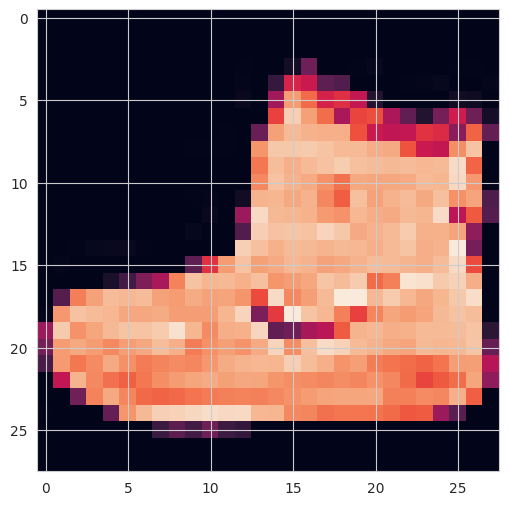

In [7]:
plt.imshow(x_train[0]);

In [8]:
y_train[5]

2

In [9]:
y_train.shape

(60000,)

In [10]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [11]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [12]:
y_train[0]

9

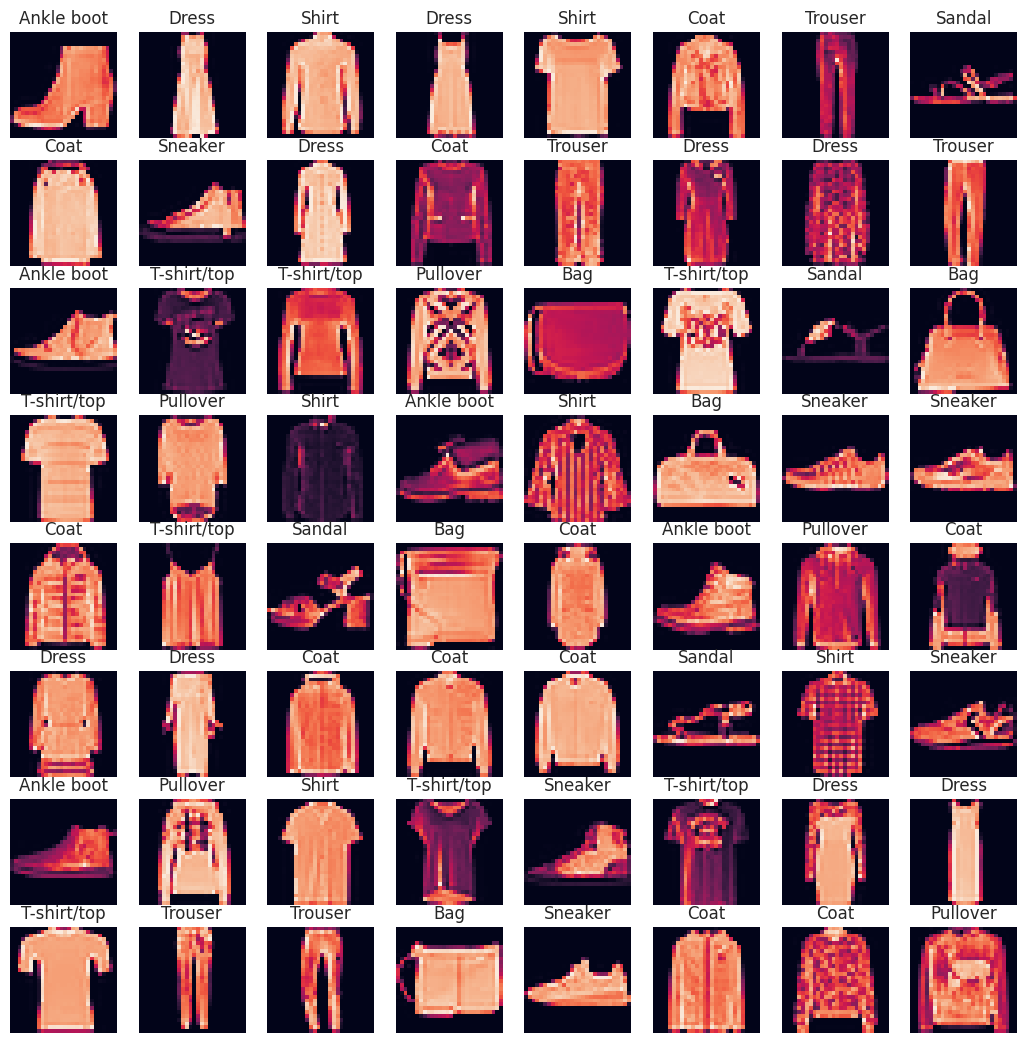

In [13]:
fig, axes = plt.subplots(8, 8)
fig.set_size_inches(13, 13)
for ax in axes.flatten():
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    ax.axis("off")
    ax.set_title(classes[int(y_train[rand_index])])
    ax.imshow(x_train[rand_index])
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [14]:
x_train[0].max()

255

In [15]:
x_train[0].min()

0

In [16]:
# Normalize image pixels

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

In [17]:
x_train[0].max()

1.0

In [18]:
x_train[0].min()

0.0

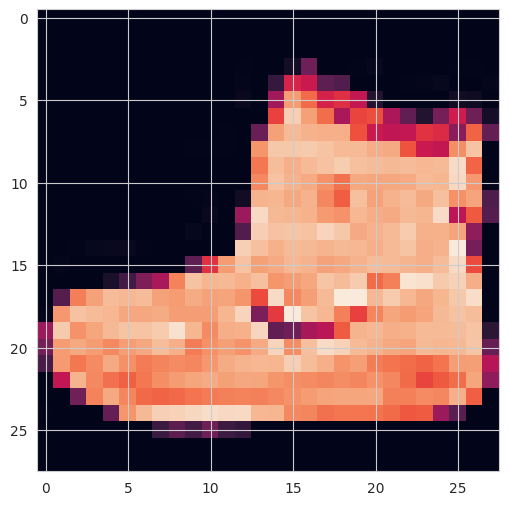

In [19]:
plt.imshow(x_train[0]);

In [20]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [21]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [22]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train.shape , x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [23]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [24]:
y_train[0]

9

In [25]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [27]:

# model = Sequential()

# model.add(
#     Conv2D(
#         filters=28,
#         kernel_size=(3, 3), # feature detector. filter
#         input_shape=(28, 28, 3),
#         activation="relu",
#         padding="same",
#     )
# )
# model.add(MaxPool2D(pool_size=(2, 2),strides=(1,1)))

# model.add(Conv2D(filters=48, kernel_size=(3, 3), activation="relu", padding="same"))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(0.0))

# model.add(Flatten())

# model.add(Dense(128, activation="relu"))
# model.add(Dense(64, activation="relu"))
# model.add(Dense(10, activation="softmax"))

# model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3)))
model.add(MaxPool2D(pool_size = (2,2), strides=(1,1)))
model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.build(x_train.shape)

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (60000, 26, 26, 28)       280       
                                                                 
 max_pooling2d (MaxPooling2  (60000, 25, 25, 28)       0         
 D)                                                              
                                                                 
 flatten (Flatten)           (60000, 17500)            0         
                                                                 
 dense (Dense)               (60000, 128)              2240128   
                                                                 
 dense_1 (Dense)             (60000, 10)               1290      
                                                                 
Total params: 2241698 (8.55 MB)
Trainable params: 2241698 (8.55 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop = EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)

In [32]:
# SEED = 42
# keras.utils.set_random_seed(SEED)
# from numpy.random import seed
# from sklearn.model_selection import train_test_split
# x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=SEED, shuffle=True)
# print("X_train shape -> ", x_train.shape)
# print("y_train shape -> ", y_train.shape)
# print("X_valid shape -> ", x_valid.shape)
# print("y_valid shape -> ", y_valid.shape)

In [33]:
model.fit(
    x_train,
    Y_train,
    batch_size=32,
    epochs=50,
    validation_data=(x_test, Y_test),
    callbacks=[early_stop],
)


Epoch 1/50
1875/1875 [==============================] - 109s 58ms/step - loss: 0.3819 - accuracy: 0.8642 - val_loss: 0.3026 - val_accuracy: 0.8862
Epoch 2/50
1875/1875 [==============================] - 116s 62ms/step - loss: 0.2480 - accuracy: 0.9103 - val_loss: 0.2869 - val_accuracy: 0.8945
Epoch 3/50
1875/1875 [==============================] - 119s 63ms/step - loss: 0.1975 - accuracy: 0.9286 - val_loss: 0.2940 - val_accuracy: 0.9008
Epoch 4/50
1875/1875 [==============================] - 107s 57ms/step - loss: 0.1642 - accuracy: 0.9393 - val_loss: 0.2927 - val_accuracy: 0.9038
Epoch 5/50
1875/1875 [==============================] - 96s 51ms/step - loss: 0.1368 - accuracy: 0.9515 - val_loss: 0.3312 - val_accuracy: 0.8940
Epoch 6/50
1875/1875 [==============================] - 91s 48ms/step - loss: 0.1143 - accuracy: 0.9586 - val_loss: 0.3522 - val_accuracy: 0.9051


In [34]:
model.metrics_names

['loss', 'accuracy']

In [35]:
summary = pd.DataFrame(model.history.history)
summary.head(7)

,loss,accuracy,val_loss,val_accuracy
0,0.382,0.864,0.303,0.886
1,0.248,0.910,0.287,0.895
2,0.197,0.929,0.294,0.901
3,0.164,0.939,0.293,0.904
4,0.137,0.952,0.331,0.894
5,0.114,0.959,0.352,0.905


**TASK 7: Plot values of metrics you used in your model.**

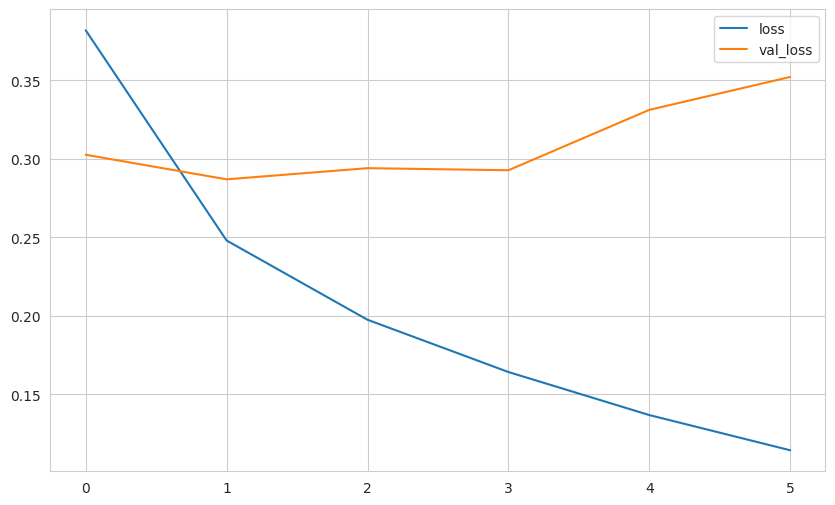

In [36]:
summary[["loss", "val_loss"]].plot()
plt.show()

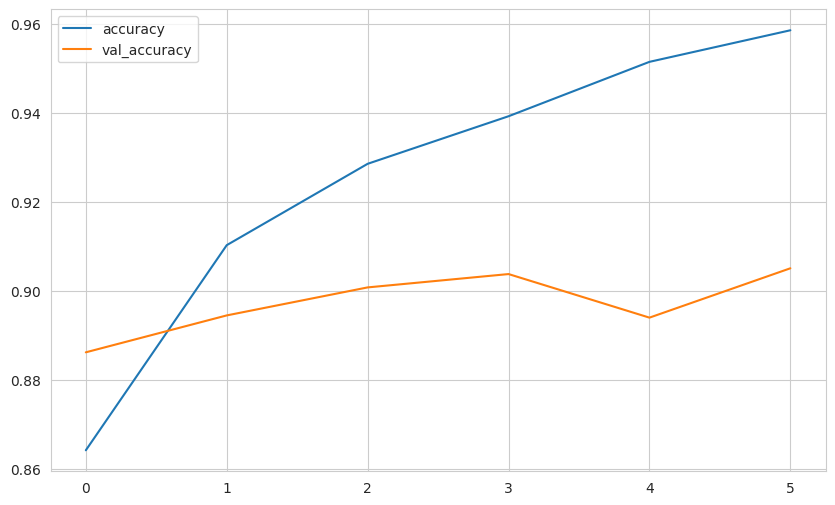

In [37]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
model.evaluate(x_test, Y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.2869 - accuracy: 0.8945


[0.2869356870651245, 0.8945000171661377]

In [41]:
score = model.evaluate(x_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2869356870651245
Test accuracy: 0.8945000171661377


## Prediction

In [42]:
pred_prob = model.predict(x_test)
pred_prob

313/313 [==============================] - 3s 10ms/step


array([[5.57410704e-06, 3.69160830e-07, 1.75362254e-06, ...,
        7.62177538e-03, 2.05416552e-04, 9.91142869e-01],
       [2.96634480e-05, 1.09674020e-10, 9.95242298e-01, ...,
        8.00302359e-12, 1.04784064e-07, 3.64003619e-11],
       [1.08455403e-07, 9.99999464e-01, 4.31683550e-10, ...,
        2.89418128e-10, 1.72080364e-10, 8.95538906e-13],
       ...,
       [5.13323757e-04, 1.16258523e-08, 1.23576308e-03, ...,
        5.13071427e-07, 9.96829510e-01, 2.53216996e-07],
       [3.06641965e-07, 9.99938309e-01, 1.35225831e-08, ...,
        5.57135033e-11, 3.84650400e-09, 7.25604465e-09],
       [9.60324425e-04, 1.14584189e-04, 2.17741914e-03, ...,
        1.01850480e-01, 3.58214322e-03, 2.89427303e-03]], dtype=float32)

In [43]:
y_pred = np.argmax(pred_prob, axis=1)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.88      0.79      0.83      1000
           3       0.92      0.87      0.89      1000
           4       0.82      0.83      0.82      1000
           5       0.97      0.98      0.98      1000
           6       0.64      0.81      0.72      1000
           7       0.94      0.97      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.90     10000
weighted avg       0.90      0.89      0.90     10000



In [45]:
print(confusion_matrix(y_test, y_pred))

[[797   2  11  15   9   1 161   0   4   0]
 [  0 979   1   8   5   0   5   0   2   0]
 [  8   0 789   7  66   0 129   0   1   0]
 [ 10  12  12 871  49   0  44   0   2   0]
 [  0   0  53  19 828   0 100   0   0   0]
 [  0   0   0   0   0 982   0  12   0   6]
 [ 74   0  31  20  53   0 813   0   9   0]
 [  0   0   0   0   0  18   0 969   0  13]
 [  2   0   1   9   1   2  12   4 969   0]
 [  0   0   0   0   0  11   0  41   0 948]]


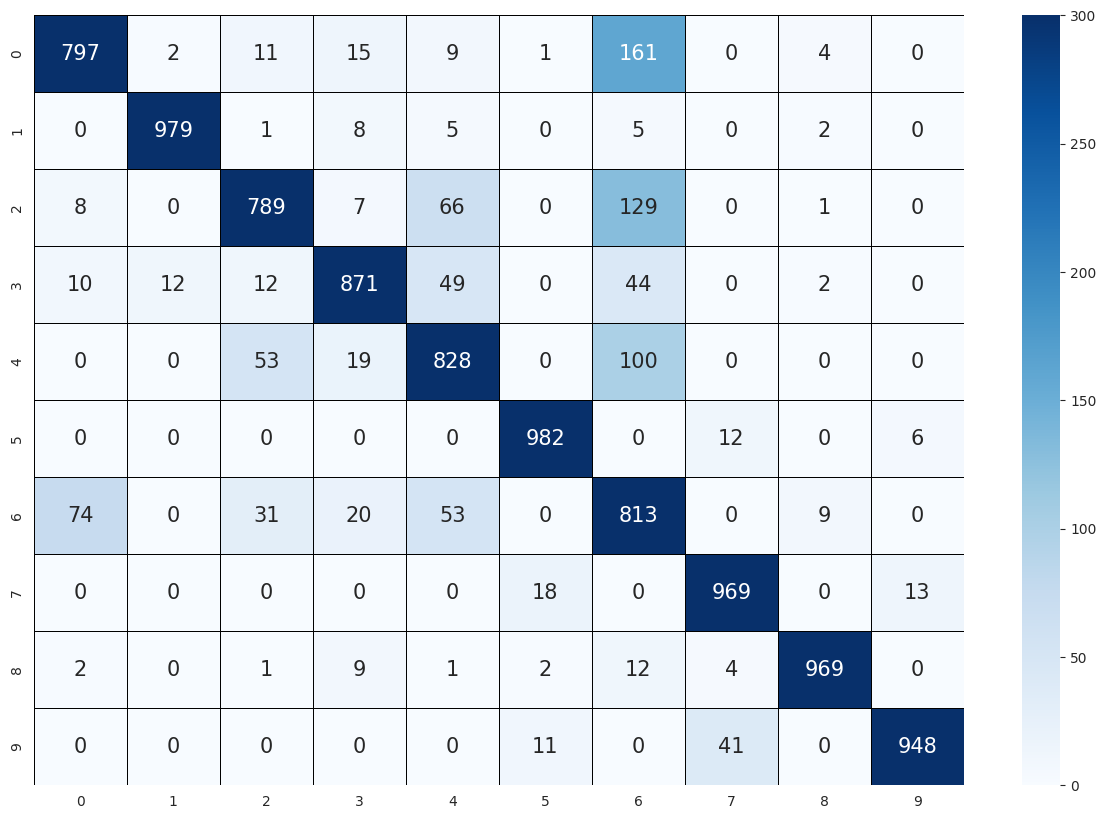

In [46]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
    vmax=300,
)
plt.show()

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___